# Experiment 4-04-490

### Sample: CeAuAl3
 - date: 4.7.2018 - 12.7.2018
 - team: Petr, Kristina
 
<img src="CeAuAl3-photo.jpg" />


### Sample orientation

Oriented on OrientExpress, regarding photos it should be max 0.3 deg out of the plane:

<img src="final.jpg" />



## Data acquisition

Data are publicly available from https://doi.ill.fr/10.5291/ILL-DATA.4-04-490

However you still need to login with your ILL credentials (free to register) to get them. Easiest is to use ssh (sftp) for data download. However you need sftp protocol and standard utility is interactive so it is not directly callable from Jupyter notebook (suggestions welcomed). Anyway, it is easy:

    sftp dt.ill.fr:/net4/serdon/illdata/201/in22/exp_4-04-490/rawdata

Enter your login/password and after correct sftp is connected type:
    
    get ?????? data

This will omit nexis files and download only ASCII datafiles.

Next step is to install ufit and iminuit - the only packages you will need for data treatment (of course it is connected with other packeges, see https://wiki.mlz-garching.de/ufit, but they should be installed automatically):

    pip install ufit
    pip install iminuit
    

### Orientation on IN 22

Sample is in H0L plane, 002 was clear to find, 200 was off by 7 degrees of gonio, obviosly sample rotated during mounting:

In [1]:
%matplotlib inline 
# import all ufit API plus pylab
from ufit.lab import *

# set a template, so that data can be referenced by number only
set_datatemplate('data/%06d')
# read one dataset from a file, with given X and Y columns
data = read_data(35516, 'GL', 'CNTS')
data.plot()
show()

Fitting rocking scan of the gonio to find out tilt of the cryostat:

In [2]:
# create a model of a simple Gaussian peak with given initial guess
model = Background() + Gauss('peak', pos=7, ampl=100, fwhm=0.5)

# fit the model, then print and plot the result
result = model.fit(data)
result.printout()
result.plot()
show()

Fit results for 35516
--------------------------------------------------------------------------------
bkgd            =  0.0044446 +/-     1830.4
peak_pos        =     7.0143 +/-    0.26925
peak_ampl       =      21609 +/-     1933.9
peak_fwhm       =     3.9687 +/-    0.75812
chi^2/NDF       =      144.7


### Automatization

Now define some usefull functions for data analysis:

In [3]:
def read_polarized(numor, naming, plotraw = False):
    """Read polarized datafile
    
    set_datatemplate should be called before
    
    Parameters:
    argument1 (int): Description of arg1
    numor (int): the number of the datafile
    naming (dict): which pal is what
 
    Returns:
    array: Array of the datasets
    """
    ds = []
    for pal in naming:
        d = read_data(numor, 'EN', 'CNTS', ncol="M1", nscale=4000000, filter={"PAL": pal})
        d.name = naming[pal]
        if plotraw:
            d.plot()
        ds.append(d)
    if plotraw:
        show()
    return ds

        
def datasub(d1,d2,prec):
    a = d1.copy()

    a.sources.extend(d2.sources)
    
    ind_unused = ones(len(a.x), dtype=bool)
    for xb, yb, dyb, nb in d2._data:
        ind = ind_unused & (a.x >= xb - prec) & (a.x <= xb + prec)
        scale = a.norm_raw[ind]/nb
        a.y_raw[ind] -= scale * yb
        a.dy_raw[ind] = sqrt(a.dy_raw[ind]**2 + (scale * dyb)**2)
        ind_unused &= ~ind
    a.y = a.y_raw / a.norm
    a.dy = a.dy_raw / a.norm
    # mask out points from which no background has been subtracted
    a.mask &= ~ind_unused
    return a

### Data reading

Polarized data has some special format so it is needed to read it in the loop, see below.

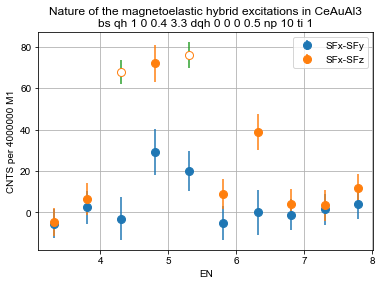

In [4]:
%matplotlib inline

namingSF = {
    1: "NSF",
    2: "SF PAR",
    3: "SF PERP",
    4: "SF PAR",
    5: "SF UP",   
}

ds = read_polarized(35547, namingSF)

#analyze set
par = ds[1].merge(0.05, ds[3], floatmerge=True)

p1 = datasub(par, ds[2], 0.05)
p1.name = "SFx-SFy"
p1.plot()
p2 = datasub(par, ds[4], 0.05)
p2.name = "SFx-SFz"
p2.plot()        

show()

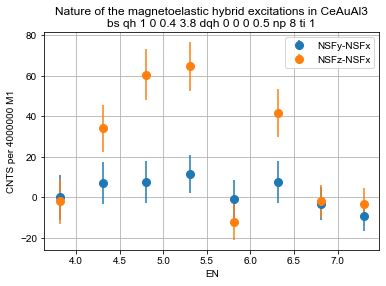

In [5]:
namingNSF = {
    1: "NSF Y",
    2: "NSF Z",
    3: "NSF X",
}

nsf_old = ds[0].copy()

ds = read_polarized(35548, namingSF)

#analyze set
nsf = ds[2].merge(0.05, nsf_old, floatmerge=True)


p1 = datasub(ds[0], nsf, 0.05)
p1.name = "NSFy-NSFx"
p1.plot()
p2 = datasub(ds[1], nsf, 0.05)
p2.name = "NSFz-NSFx"
p2.plot()        

show()

ufit using minuit backend


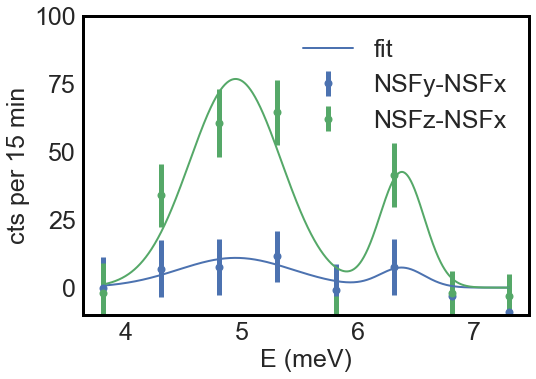

In [7]:
##fitting and nice plotting

style.use(['seaborn', 'seaborn-whitegrid'])

mpl.rcParams['lines.linewidth'] = 5
mpl.rcParams['axes.labelsize'] = 25
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['axes.edgecolor'] ="0"
mpl.rcParams['legend.fontsize'] = 25
mpl.rcParams['xtick.labelsize'] = 25
mpl.rcParams['ytick.labelsize'] = 25


set_backend("minuit")
# create a model of a simple Gaussian peak with given initial guess
model =   GaussInt('CF', pos="4.95", fwhm=1.) \
        + GaussInt('CFsplit', pos="6.3806", fwhm="0.45")

# fit the model, then print and plot the result
r1 = model.fit(p1)
#r1.printout()
r1.plot(params=False)

r2 = model.fit(p2)
#r2.printout()
r2.plot(params=False)
title("")
xlabel("E (meV)")
ylabel("cts per 15 min")
ylim(-10,100)
grid(False)
savefig('onlydata.png')
show()


## End of the first measurement

After the first two inelastic scans, ILL reactor went down and experiment was postponed.

# Experiment 4-04-490 - second try

### Sample: CeAuAl3
 - date: 3.2.2020 - 10.2.2020
 - team: Petr, Astrid, Michal

## IN3 pre-alignment

sample oriented C along gu

search for 002 reflection

finally aligned on IN3 with shift 
 - at 2 0 0: 0.4 deg  (35000 cts, numor 111707)
 - at 0 0 4: 0.25 deg (5800 cts, numor 111706)

## IN22 alignment

Putted Cd around the sample

Sample aligned:
 - gu = 1.07
 - gl = 0.88
 - height adjusted based on slits
 - slits adjusted in the way:
   - top and bottom closed to not block the sample
   - left and right fully opened
 - lattice parameters:
   - c = 10.841
   - a = b = 4.331

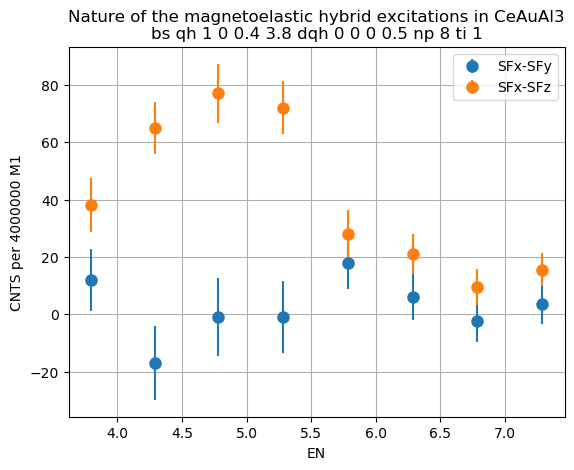

In [10]:
%matplotlib inline

mpl.style.use('default')

namingSF = {
    1: "NSF X",
    2: "SF X",
    3: "SF Y",
    4: "SF X",
    5: "SF Z",   
}
ds = read_polarized(43314, namingSF)


#analyze set
par = ds[1].merge(0.05, ds[3], floatmerge=True)

p1 = datasub(par, ds[2], 0.05)
p1.name = "SFx-SFy"
p1.plot()
p2 = datasub(par, ds[4], 0.05)
p2.name = "SFx-SFz"
p2.plot()        

show()

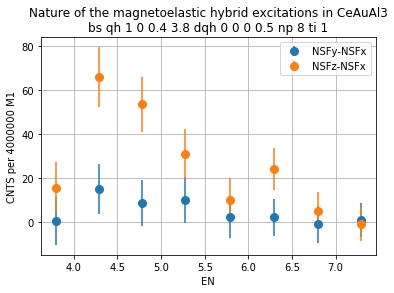

In [13]:
%matplotlib inline

namingSF = {
    1: "NSF Y",
    2: "NSF Z",
    3: "NSF X",
}

nsf_old = ds[0].copy()

ds = read_polarized(43315, namingSF)

#analyze set
nsf = ds[2].merge(0.05, nsf_old, floatmerge=True)

p3 = datasub(ds[0], nsf, 0.05)
p3.name = "NSFy-NSFx"
p3.plot()
p4 = datasub(ds[1], nsf, 0.05)
p4.name = "NSFz-NSFx"
p4.plot()        

show()

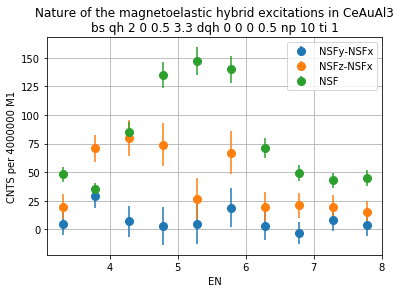

In [14]:
ds = read_polarized(43316, namingSF)

#analyze set
nsf = ds[2] #.merge(0.05, nsf_old, floatmerge=True)

p1 = datasub(ds[0], nsf, 0.05)
p1.name = "NSFy-NSFx"
p1.plot()
p2 = datasub(ds[1], nsf, 0.05)
p2.name = "NSFz-NSFx"
p2.plot()        
nsf.name = "NSF"
nsf.plot()
show()

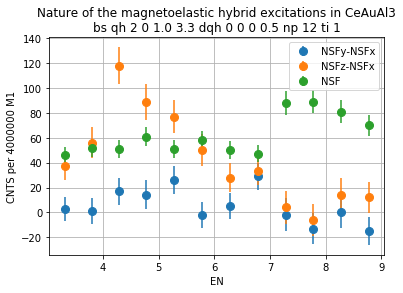

In [15]:
ds = read_polarized(43317, namingSF)

#analyze set
nsf = ds[2] #.merge(0.05, nsf_old, floatmerge=True)

p1 = datasub(ds[0], nsf, 0.05)
p1.name = "NSFy-NSFx"
p1.plot()
p2 = datasub(ds[1], nsf, 0.05)
p2.name = "NSFz-NSFx"
p2.plot()        
nsf.name = "NSF"
nsf.plot()
show()

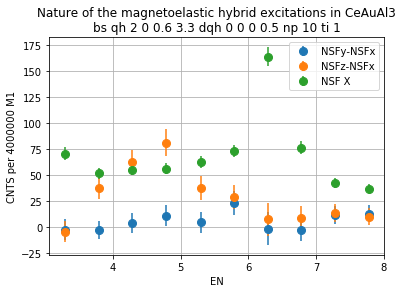

In [17]:
namingNSF = {
    1: "NSF Y",
    2: "NSF Z",
    3: "NSF X",
    4: "NSF X",
}

ds = read_polarized(43363, namingNSF)

#merge NSF X channels
nsf = ds[2].merge(0.05, ds[3], floatmerge=True)

p1 = datasub(ds[0], nsf, 0.05)
p1.name = "NSFy-NSFx"
p1.plot()
p2 = datasub(ds[1], nsf, 0.05)
p2.name = "NSFz-NSFx"
p2.plot()     
nsf.name = "NSF X"
nsf.plot()

show()

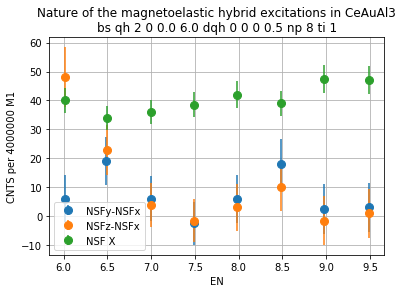

In [18]:
ds = read_polarized(43364, namingNSF)

#merge
nsf = ds[2].merge(0.05, ds[3], floatmerge=True)

p1 = datasub(ds[0], nsf, 0.05)
p1.name = "NSFy-NSFx"
p1.plot()
p2 = datasub(ds[1], nsf, 0.05)
p2.name = "NSFz-NSFx"
p2.plot()     
nsf.name = "NSF X"
nsf.plot()

show()

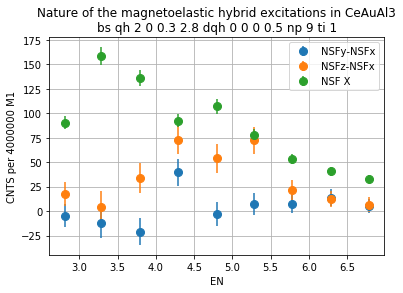

In [19]:
ds = read_polarized(43366, namingNSF)

#analyze set
nsf = ds[2].merge(0.05, ds[3], floatmerge=True)


p1 = datasub(ds[0], nsf, 0.05)
p1.name = "NSFy-NSFx"
p1.plot()
p2 = datasub(ds[1], nsf, 0.05)
p2.name = "NSFz-NSFx"
p2.plot()     
nsf.name = "NSF X"
nsf.plot()

show()

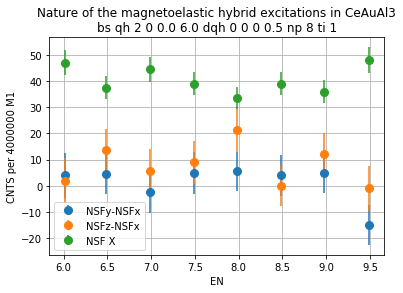

In [20]:
ds = read_polarized(43367, namingNSF)

nsf = ds[2].merge(0.05, ds[3], floatmerge=True)


p1 = datasub(ds[0], nsf, 0.05)
p1.name = "NSFy-NSFx"
p1.plot()
p2 = datasub(ds[1], nsf, 0.05)
p2.name = "NSFz-NSFx"
p2.plot()     
nsf.name = "NSF X"
nsf.plot()

show()

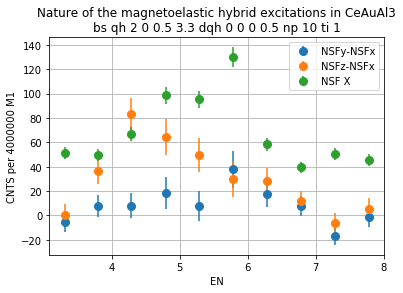

In [21]:
ds = read_polarized(43369, namingNSF)

#merge
nsf = ds[2].merge(0.05, ds[3], floatmerge=True)

p1 = datasub(ds[0], nsf, 0.05)
p1.name = "NSFy-NSFx"
p1.plot()
p2 = datasub(ds[1], nsf, 0.05)
p2.name = "NSFz-NSFx"
p2.plot()     
nsf.name = "NSF X"
nsf.plot()

show()

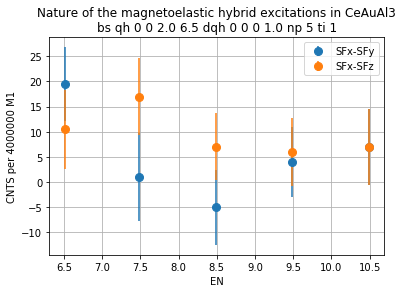

In [22]:
namingSF = {
    1: "SF X",
    2: "SF Y",
    3: "SF X",
    4: "SF Z",
}

ds = read_polarized(43370, namingSF)

#mege SF X
sf = ds[0].merge(0.05, ds[2], floatmerge=True)

p1 = datasub(sf, ds[1], 0.05)
p1.name = "SFx-SFy"
p1.plot()
p2 = datasub(sf, ds[3], 0.05)
p2.name = "SFx-SFz"
p2.plot()     

show()

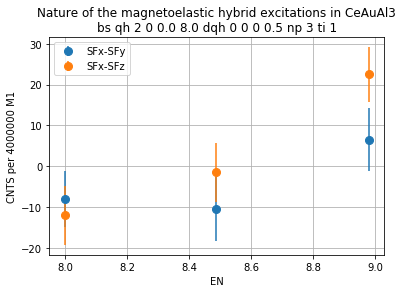

In [23]:
ds = read_polarized(43371, namingSF)

sf = ds[0].merge(0.05, ds[2], floatmerge=True)


p1 = datasub(sf, ds[1], 0.05)
p1.name = "SFx-SFy"
p1.plot()
p2 = datasub(sf, ds[3], 0.05)
p2.name = "SFx-SFz"
p2.plot()     


show()